In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving suv_data.csv to suv_data.csv


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
import io
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv(io.StringIO(uploaded['suv_data.csv'].decode('utf-8')))
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
gender=pd.get_dummies(df[['Gender']],drop_first=True)
gender
df=pd.concat([df,gender],axis=1)


,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [ ]:
#df.drop(['Gender'],axis=1,inplace=True)
x=df[['Age','EstimatedSalary','Gender_Male']]
y=df[['Purchased']]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df[['Age','Gender_Male','EstimatedSalary']])
scaler_features=scaler.transform(df[['Age','Gender_Male','EstimatedSalary']])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
df[['Age','Gender_Male','EstimatedSalary']]

,Age,Gender_Male,EstimatedSalary
0,19,1,19000
1,35,1,20000
2,26,0,43000
3,27,0,57000
4,19,1,76000
...,...,...,...
395,46,0,41000
396,51,1,23000
397,50,0,20000
398,36,1,33000


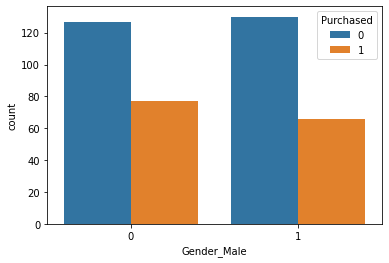

In [ ]:
sns.countplot(x='Gender_Male',hue='Purchased',data=df)

In [ ]:
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


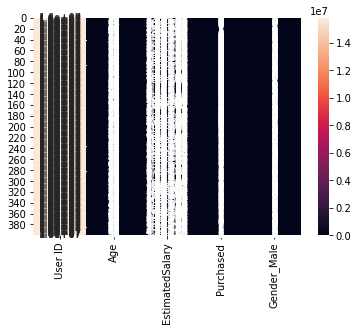

In [ ]:
sns.heatmap(df,annot=True)

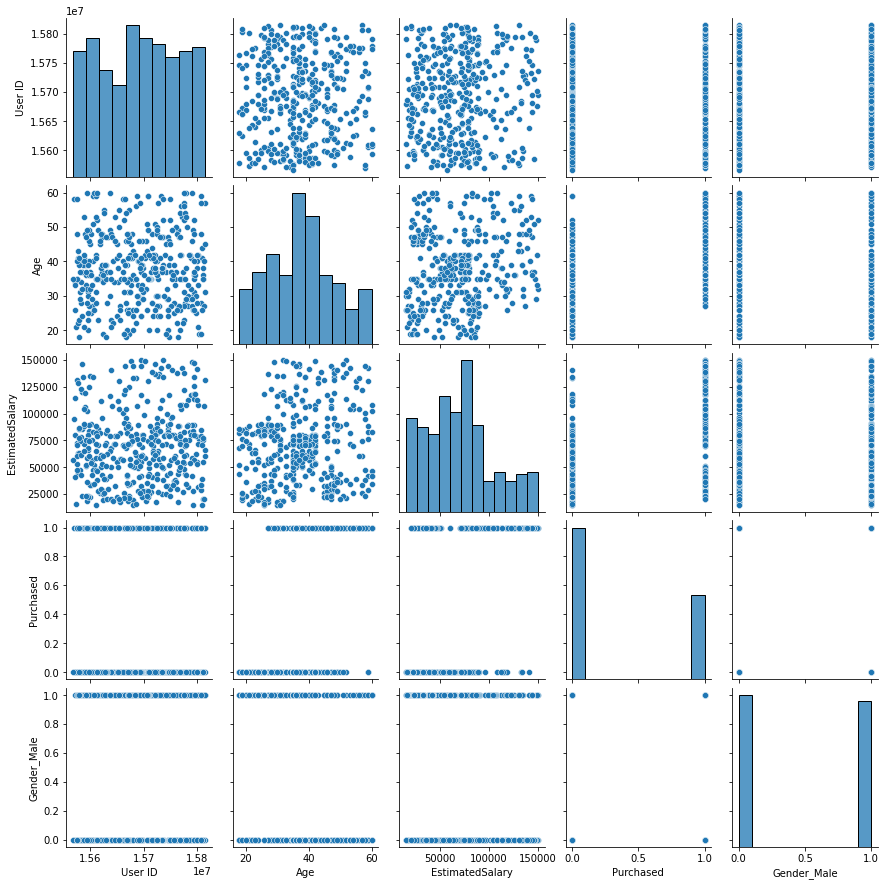

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=5)


In [ ]:
from sklearn.linear_model import LogisticRegression
pred=LogisticRegression()
pred.fit(x_train,y_train)
y_=pred.predict(x_test)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.66      1.00      0.80        66\n           1       0.00      0.00      0.00        34\n\n    accuracy                           0.66       100\n   macro avg       0.33      0.50      0.40       100\nweighted avg       0.44      0.66      0.52       100\n'

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_)

0.66

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_)

0.66